In [3]:
# load important stuff
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
# These are some new scikit learn toys that will make your life easier (see below)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline

In [1]:
import os 
os.chdir ('/Users/xupech/Desktop/brandeis graduate school/Academics/2020 SPRING/HS 339 ADVANCED HEALTHCARE ANALYTICS/Case 4/Data')

In [4]:
covid = pd.read_csv('final result.csv')
covid.dtypes

Unnamed: 0                   int64
Patient ID                   int64
Mortality (1= death)         int64
Age_18_39                    int64
Age_40_49                    int64
Age_50_59                    int64
Age_60_69                    int64
Age_70_74                    int64
Age_75_99                    int64
Gender_Male                  int64
BEHAV_AdjustmentStress       int64
BEHAV_Affective_A            int64
BEHAV_Affective_B            int64
BEHAV_Anxiety_Phobia         int64
BEHAV_Ocd_Adhd               int64
BEHAV_Other_Nos_A            int64
BEHAV_Other_Nos_B            int64
BEHAV_Personality_Conduct    int64
BEHAV_Psychosis              int64
BEHAV_Substance_Abuse        int64
CHEST_Airway_Lungs_A         int64
CHEST_Airway_Lungs_B         int64
CHEST_Chest_Wall_A           int64
CHEST_Chest_Wall_B           int64
CHEST_Complication           int64
CHEST_Lung                   int64
CHEST_Metastatic             int64
CHEST_Other_Nec              int64
CHEST_Other_Nos_A   

In [51]:
covid.head()

,Unnamed: 0,Patient ID,Mortality (1= death),Age_18_39,Age_40_49,Age_50_59,Age_60_69,Age_70_74,Age_75_99,Gender_Male,...,UROLG_GEN_Other_Nos_A,UROLG_GEN_Other_Nos_B,UROLG_GEN_Pers_Fam_Hx_Ds,UROLG_GEN_Screening,UROLG_GEN_Service,UROLG_GEN_Sgn_Symp,UROLG_GEN_Status2,UROLG_GEN_Status_A,UROLG_GEN_Status_B,Undefined_Undefined
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = covid['Mortality (1= death)']
X = covid.iloc[:,3:-1]
print(np.mean(y))
print(len(y))
X.head()

0.05738830595224926
370633


,Age_18_39,Age_40_49,Age_50_59,Age_60_69,Age_70_74,Age_75_99,Gender_Male,BEHAV_AdjustmentStress,BEHAV_Affective_A,BEHAV_Affective_B,...,UROLG_GEN_Kidney,UROLG_GEN_Other_Nos_A,UROLG_GEN_Other_Nos_B,UROLG_GEN_Pers_Fam_Hx_Ds,UROLG_GEN_Screening,UROLG_GEN_Service,UROLG_GEN_Sgn_Symp,UROLG_GEN_Status2,UROLG_GEN_Status_A,UROLG_GEN_Status_B
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train_set, X_test_set, y_train_set, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state = 0)
#scaler = StandardScaler().fit(X_train_set)
#X_train_set = scaler.transform(X_train_set)
#X_test_set = scaler.transform(X_test_set)
len(X_test_set)

92659

In [ ]:
#X_train_set.shape
#y_train_set = np.array(y_train_set)
#y_train_set=np.reshape(y_train_set, (-1,1))

#y_train_set.T
covidt = np.concatenate((X_train_set, y_train_set), axis=1)
covidt
covidt[:, -1]

# generate special classes for types
aclass0 = covidt[covidt[:,-1]==0]
aclass1 = covidt[covidt[:,-1]==1]
count0 = len(aclass0)
count1 = len(aclass1)
print(count0)
print(count1)

# under sampling
# Generate sample of class 0 types matching number of class 1 types

n_samples= count1
inds = np.random.randint(0,count0, size=n_samples)
under0 = aclass0[inds]

covidus = np.concatenate((under0, aclass1), axis=0)

# set up data, and check if balanced
ytrain = covidus[:,-1]
Xtrain = covidus[:,:-1]
print(np.mean(ytrain))

In [ ]:
# Try for random forest and grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
nmc = 100
#  Note:  no need for scaling, back to simple parameters
# set up dictionary for grid search
param_grid={'max_features':[50,100,150],'max_depth':[10,20,35],'n_estimators':[100]}
# set up cross-validation shuffles
cvf = ShuffleSplit(test_size=0.25,n_splits=nmc)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(class_weight = {0:0.95, 1:0.05}),param_grid,cv=cvf,scoring = 'f1', return_train_score=True)
# implement search
grid_search.fit(X_train_set,y_train_set)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_features=150, max_depth=35, n_estimators=100, class_weight = {0:0.95, 1:0.05})
model.fit(X_train_set, y_train_set)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.95, 1: 0.05}, criterion='gini',
                       max_depth=35, max_features=150, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(X_test_set)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, roc_auc_score, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     87390
           1       0.86      0.64      0.73      5269

    accuracy                           0.97     92659
   macro avg       0.92      0.82      0.86     92659
weighted avg       0.97      0.97      0.97     92659



In [17]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[86819   571]
 [ 1879  3390]]


In [18]:
model.feature_importances_

array([3.53411746e-03, 6.45052138e-03, 8.32760593e-03, 1.14931820e-02,
       1.28999011e-02, 3.05844204e-02, 2.79727186e-02, 1.82425321e-03,
       1.72029299e-03, 9.81959011e-03, 9.86664697e-03, 6.06552898e-04,
       1.24768386e-03, 1.83409037e-04, 3.43835818e-04, 1.00901274e-03,
       2.61674980e-02, 2.57126872e-02, 5.62813379e-03, 5.08334938e-03,
       3.76532641e-04, 2.00586691e-04, 1.69779163e-04, 5.49015611e-04,
       0.00000000e+00, 1.58392112e-02, 1.65315286e-02, 4.79013259e-03,
       3.31703531e-03, 8.35256912e-03, 3.20395431e-05, 1.42445764e-02,
       2.42916392e-04, 3.19593877e-03, 5.32204631e-03, 1.24528980e-02,
       3.01545704e-03, 1.80261038e-02, 6.15186229e-02, 4.70429387e-04,
       1.07178016e-03, 2.94543973e-02, 5.65138867e-03, 7.94437771e-05,
       2.86309177e-02, 2.88936042e-02, 2.33972181e-05, 6.13441428e-03,
       1.21719927e-03, 1.92048177e-03, 1.63511318e-03, 4.48210741e-03,
       5.24117325e-03, 6.04522675e-03, 1.75375653e-03, 8.53361409e-04,
      

In [20]:
reshaped_cof = pd.DataFrame(model.feature_importances_.reshape(-1,1))
predictors = pd.DataFrame(covid.columns)
predictors_final = predictors.drop(predictors.index[0], axis=0)
predictors_final.index = np.arange(1,len(predictors_final)+1)
reshaped_cof.index =  np.arange(1,len(reshaped_cof)+1)

In [21]:
coefficient_tb1= pd.concat([predictors_final,reshaped_cof], axis=1, ignore_index=True)
coefficient_tb2 = coefficient_tb1.rename(columns={0: "Predictor", 1: "Coefficient"})
coefficient_tb_final = coefficient_tb2.sort_values(by=["Coefficient"],ascending=False)
coefficient_tb_final.head(10)
coefficient_tb_final.to_csv('coefficient_tb_final.csv')

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
feature_importance = abs(coefficient_tb_final[coefficient_tb_final.columns[1]])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
score = feature_importance.head(10)
predictors_10 = coefficient_tb_final[coefficient_tb_final.columns[0]].head(10)
feature_importance_table = pd.concat([predictors_10,score], axis=1)
feature_importance_table
feature_importance_table_desc = feature_importance_table.sort_values(by=["Coefficient"],ascending=True)
feature_importance_table_desc

,Predictor,Coefficient
113,GENRL_UNSP_Metastatic,40.113291
18,BEHAV_Psychosis,41.796591
17,BEHAV_Personality_Conduct,42.535897
7,Age_70_74,45.470326
45,CVASC_Heart_Rhythm_B,46.540245
46,CVASC_Other,46.967248
42,CVASC_Complication_A,47.878831
6,Age_60_69,49.715710
66,ENDOC_MET_Adrenal,55.414313
39,CVASC_Arterial_B,100.000000


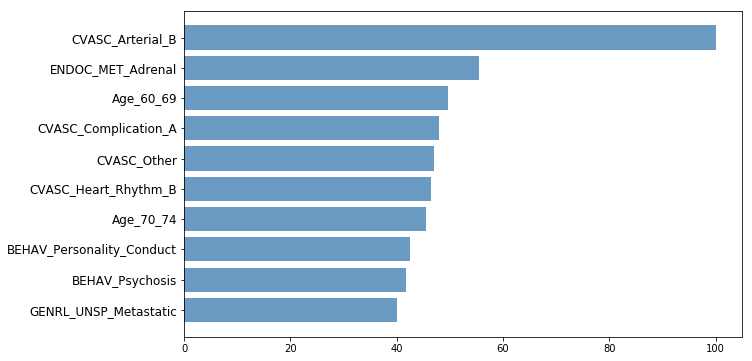

In [24]:
fig = plt.figure(figsize=(10,6))

share = feature_importance_table_desc[feature_importance_table_desc.columns[1]]
plt.barh(range(10), share, align = 'center',color='steelblue', alpha = 0.8)

plt.yticks(range(10),feature_importance_table_desc[feature_importance_table_desc.columns[0]], fontsize=12)
#ax.set_xlabel('Relative Feature Importance (%)')

#plt.tight_layout()   
plt.show()